# eda002

In [59]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
%matplotlib inline

## データセットの読み込み

In [60]:
input_path = Path("../input")

train_df = pd.read_parquet(input_path / "train.parquet")
test_df = pd.read_parquet(input_path / "test.parquet")

## EDA

datetime(日時)：日付 + 時間(1時間ごとに1data)\
season(季節)：1 = 春, 2 = 夏, 3 = 秋, 4 = 冬\
holiday(祝日)：0 = 祝日ではない, 1 = 祝日\
workingday(労働日)：0 = 休日または休暇, 1 = 労働日\
weather(天気)：\
1: 快晴, 雲が少ない, 部分的に曇り, 部分的に曇り\
2：霧＋曇り、霧＋雲切れ、霧＋雲少、霧\
3: 小雪、小雨+雷雨+雲が散らばる、小雨+雲が散らばる\
4：大雨＋氷霰＋雷雨＋霧、雪＋霧\
temp(気温)：摂氏温度\
atemp(体感気温)：摂氏の感じる温度\
humidity(湿度)：相対湿度\
windspeed(風速)：風速\
casual(非登録ユーザーの利用数)：非登録ユーザーの利用数\
registered(登録ユーザーの利用数)：登録ユーザーの利用数\
count(総利用数)：総利用数


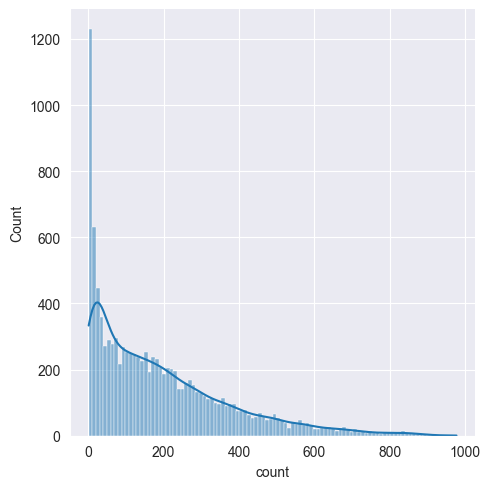

In [61]:
sns.displot(train_df["count"], bins=100, kde=True)
plt.show()

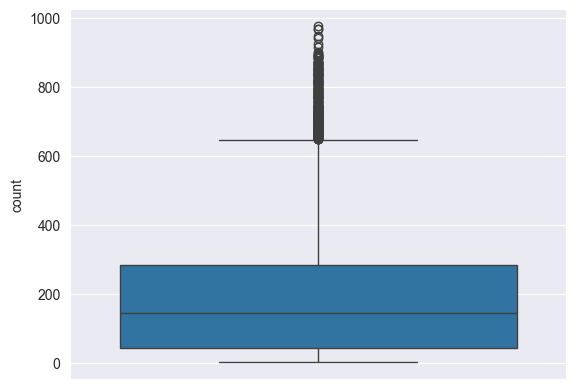

In [62]:
sns.boxplot(train_df["count"])
plt.show()

In [63]:
print(f'歪度：{train_df["count"].skew()}')
print(f'尖度：{train_df["count"].kurt()}')

歪度：1.2420662117180776
尖度：1.3000929518398334


流石に外れ値が多すぎる。なんかしら変換したほうが良いかも。対数変換とか。

In [64]:
train_df["count"] = train_df["count"].apply(lambda x: np.log(x))

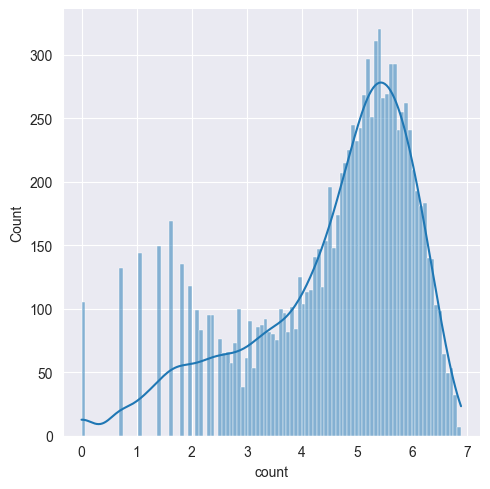

In [65]:
sns.displot(train_df["count"], bins=100, kde=True)
plt.show()

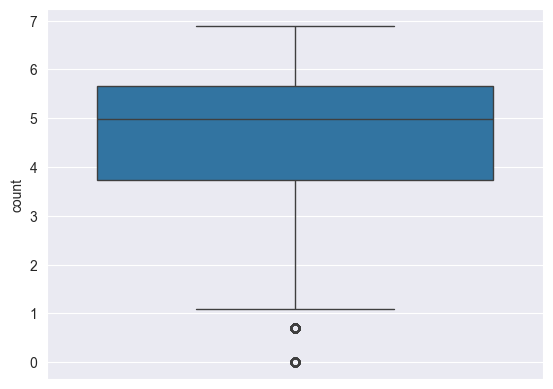

In [66]:
sns.boxplot(train_df["count"])
plt.show()

In [67]:
print(f'歪度：{train_df["count"].skew()}')
print(f'尖度：{train_df["count"].kurt()}')

歪度：-0.9712277227866112
尖度：0.24662183416964112


分布的にはかなりきれいになった気がする。他カラムとの相性を見る必要はあるが、対数変換は有効そう。